# Data Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('data/titanic/train.csv')
test_data = pd.read_csv('data/titanic/test.csv')
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
train_data.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hogeboom, Mrs. John C (Anna Andrews)",male,347082,G6,S
freq,1,577,7,4,644


In [4]:
train_data = train_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
test_data = test_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
train_data.head() # check everything looks okay

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Data Exploration and Data Visualization

Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

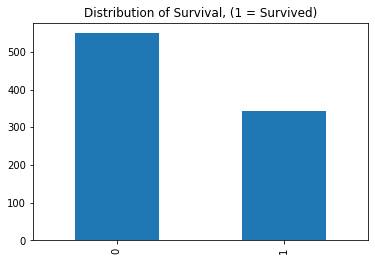

In [5]:
train_data.Survived.value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")

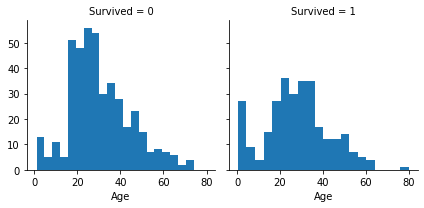

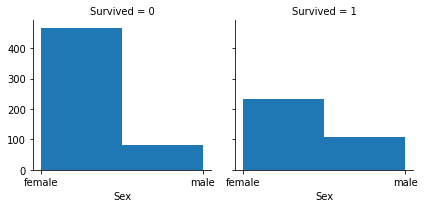

In [6]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Sex', bins=2)

Text(0.5, 1.0, 'Class Distribution')

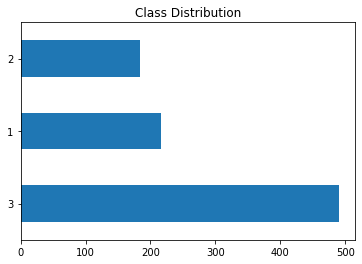

In [7]:
train_data.Pclass.value_counts().plot(kind="barh")
plt.title("Class Distribution")

<AxesSubplot:>

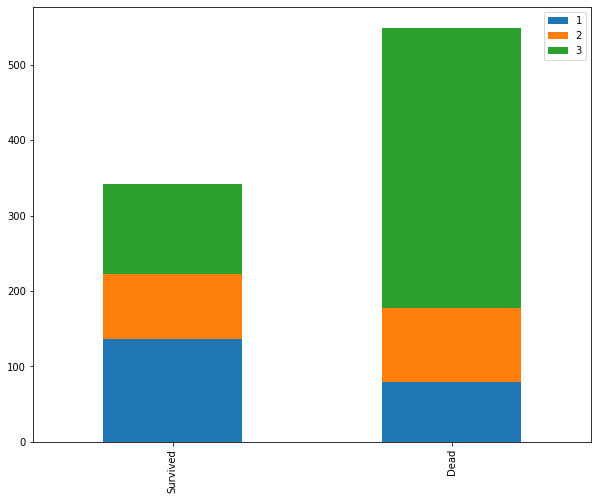

In [8]:
pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

Text(0.5, 1.0, 'Passengers per boarding location')

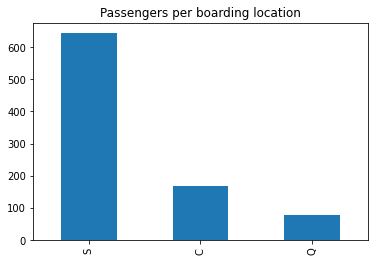

In [9]:
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Survival and Death in Different ports')

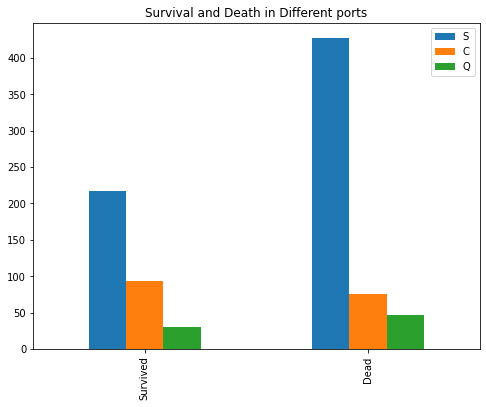

In [10]:
survived = train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title("Survival and Death in Different ports")

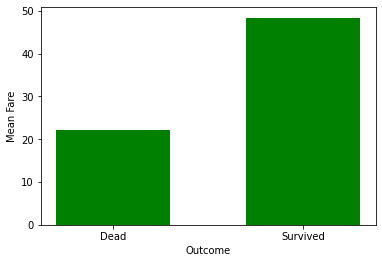

In [11]:
survived_0 = train_data[train_data['Survived'] == 0]["Fare"].mean()
survived_1 = train_data[train_data['Survived'] == 1]["Fare"].mean()
xs  = [survived_0, survived_1]
ys = ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center',color = 'green')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

# Data Wrangling: Convert categorical variables to integers

In [12]:
def wrangle(dataset):
    # sex {male, female} to {0, 1}
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    # embarked {S, C, Q} => 3 binary variables
    embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return dataset.drop('Embarked', axis=1)
 
train_data = wrangle(train_data)
test_data = wrangle(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


# Data Exploration: Correlation Analysis

In [13]:
corr = train_data.corr()
print(corr)

            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex         0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age        -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp      -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare        0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked_C  0.168240 -0.243292  0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q  0.003650  0.221009  0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S -0.155660  0.081720 -0.125722 -0.032523  0.070941  0.063036   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.257307    0.168240    0.003650   -0.155660  
Pclass     -0.549500   -0.243292    0.221009    0.081720  
Sex     

<AxesSubplot:>

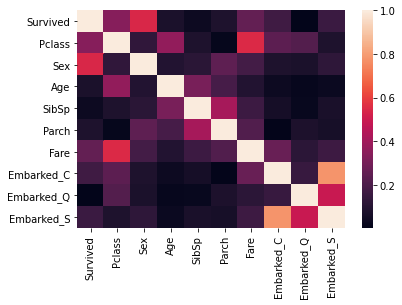

In [14]:
sns.heatmap(np.abs(corr),
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Data Wrangling

## Filling missing values

In [15]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

## Creating New Features

In [16]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

## Final check before Machine Learning

In [17]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    int32  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  FamilySize  891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), uint8(3)
memory usage: 51.5 KB
None


In [18]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    int32  
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
 9   FamilySize  418 non-null    int64  
dtypes: float64(1), int32(2), int64(4), uint8(3)
memory usage: 20.9 KB
None


In [19]:
mean_fare = 32
test_data['Fare'] = test_data['Fare'].fillna(32)

# Machine Learning Models: Training and Evaluation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X_train = train_data.drop("Survived", axis=1)[:800]
Y_train = train_data["Survived"][:800]
X_crossValidation = train_data.drop("Survived", axis=1)[800:]
Y_crossValidation = train_data["Survived"][800:]
X_test = test_data

## Logistic Regression

In [22]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_logistic.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predL = model_logistic.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

80.25
83.52


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Support Vector Machines

In [23]:
svc = SVC()
svc.fit(X_train, Y_train)
train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(svc.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = svc.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

68.62
68.13


## K Nearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
train_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(knn.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predK = knn.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

82.5
75.82


## Random Forest

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(random_forest.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predR = random_forest.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

98.0
87.91
